In [279]:
import os
import shutil
import random
import numpy as np
import statistics
import cv2
import json
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm.notebook import tqdm

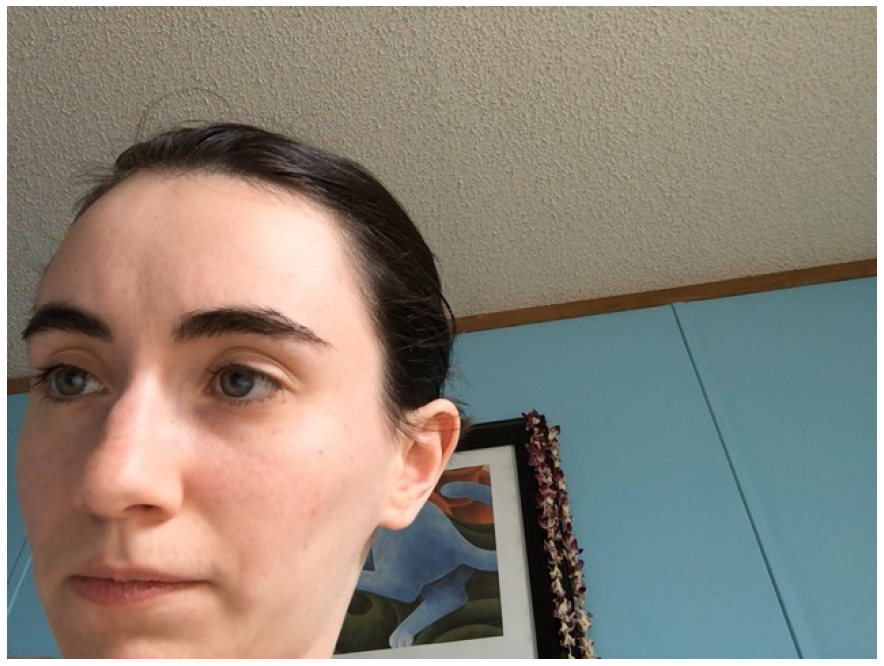

In [21]:
path = './Data_MIT/00358/'
plt.figure(figsize=(16,12))
im = plt.imread(path + 'frames/03083.jpg')
plt.axis('off')
plt.imshow(im);

In [20]:
idx = 3083 #3111 #3004 #2890 #2675 #2610 #2674 #2596
# idx = 941

# Face Crop
with open(path + '/appleFace.json', 'r') as file:
    face = json.load(file)
print('Face dictionary''s keys:', face.keys())
face =[round(face['H'][idx]), round(face['W'][idx]), round(face['X'][idx]),
       round(face['Y'][idx]), round(face['IsValid'][idx])]
    

    # Left Eye
with open(path + '/appleLeftEye.json', 'r') as file:
    eye_l = json.load(file)
print('Left eye dictionary''s keys:', eye_l.keys())
eye_l =[round(eye_l['H'][idx]), round(eye_l['W'][idx]), round(eye_l['X'][idx]),
        round(eye_l['Y'][idx]), round(eye_l['IsValid'][idx])]


# Right Eye
with open(path + '/appleRightEye.json', 'r') as file:
    eye_r = json.load(file)
print('Right eye dictionary''s keys:', eye_r.keys())
eye_r =[round(eye_r['H'][idx]), round(eye_r['W'][idx]), round(eye_r['X'][idx]),
        round(eye_r['Y'][idx]), round(eye_r['IsValid'][idx])]


# Face Grid
with open(path + '/faceGrid.json', 'r') as file:
    grid = json.load(file)
print('Face grid dictionary''s keys:', grid.keys())
grid =[round(grid['H'][idx]), round(grid['W'][idx]), round(grid['X'][idx]),
       round(grid['Y'][idx]), round(grid['IsValid'][idx])]

    
# Info
with open(path + '/info.json', 'r') as file:
    info = json.load(file)
print('Info dictionary''s keys:', info.keys())
info =[info['TotalFrames'], info['NumFaceDetections'], info['NumEyeDetections'],
       info['Dataset'], info['DeviceName']]


# dot
with open(path + '/dotInfo.json', 'r') as file:
    dot = json.load(file)
print('Dot dictionary''s keys:', dot.keys())
dot =[dot['XPts'][idx], dot['YPts'][idx], dot['XCam'][idx],
      dot['YCam'][idx], dot['Time'][idx]]


# screen
with open(path + '/screen.json', 'r') as file:
    screen = json.load(file)
print('Screen dictionary''s keys:', screen.keys())
screen =[screen['H'][idx], screen['W'][idx], screen['Orientation'][idx]]



# adjust the eyes' coordinates to express the location
# for within the frame
eye_l[2] += face[2]
eye_l[3] += face[3]
eye_r[2] += face[2]
eye_r[3] += face[3]

print('\n\nValidity:\nface', face[4], '\nleft eye', eye_l[4],
      '\nright eye', eye_r[4], '\ngrid', grid[4],)

Face dictionarys keys: dict_keys(['H', 'W', 'X', 'Y', 'IsValid'])
Left eye dictionarys keys: dict_keys(['H', 'W', 'X', 'Y', 'IsValid'])
Right eye dictionarys keys: dict_keys(['H', 'W', 'X', 'Y', 'IsValid'])
Face grid dictionarys keys: dict_keys(['X', 'Y', 'W', 'H', 'IsValid'])
Info dictionarys keys: dict_keys(['TotalFrames', 'NumFaceDetections', 'NumEyeDetections', 'Dataset', 'DeviceName'])
Dot dictionarys keys: dict_keys(['DotNum', 'XPts', 'YPts', 'XCam', 'YCam', 'Time'])
Screen dictionarys keys: dict_keys(['H', 'W', 'Orientation'])


Validity:
face 1 
left eye 0 
right eye 0 
grid 1


In [19]:
info

[3487, 3302, 1979, 'train', 'iPad Air 2']

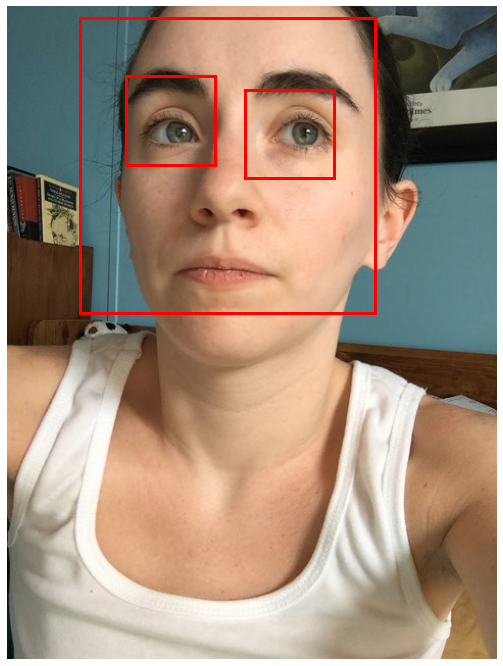

In [84]:
fig, ax = plt.subplots(figsize=(16,12))

eyel_patch = patches.Rectangle((eye_l[2], eye_l[3]), eye_l[1], eye_l[0],
                               linewidth=3, edgecolor='r',facecolor='none')

eyer_patch = patches.Rectangle((eye_r[2], eye_r[3]), eye_r[1], eye_r[0],
                               linewidth=3, edgecolor='r',facecolor='none')

face_patch = patches.Rectangle((face[2], face[3]), face[1], face[0],
                               linewidth=3, edgecolor='r',facecolor='none')

ax.add_patch(eyel_patch)
ax.add_patch(eyer_patch)
ax.add_patch(face_patch)
ax.axis('off')
ax.imshow(im);

In [85]:
dot

[164.680966139, 682.902931213, -4.38902196547, 7.50264703528, 1.456419]

In [86]:
screen

[1024, 768, 2]

In [87]:
info

[3487, 3302, 1979, 'train', 'iPad Air 2']

## Check MIT dataset to see how many valid and how many invalid frames are there and also check the range of frames per subject

In [140]:
adrs = './Data_MIT/'
folders = [name for name in os.listdir(adrs)]
folders.remove('README.md')
folders.remove('LICENSE.md')
len(folders)

1474

In [162]:
TotalFrames = 0
NumEyeDetections = 0
paper_TotalFrames = 0
paper_NumEyeDetections = 0
wrongs = []

for folder in tqdm(folders):
    path = adrs + folder
    
    with open(path + '/appleFace.json', 'r') as file:
        face = json.load(file)
    fvalid = []
    for idx, val in enumerate(face['IsValid']):
        if val:
            fvalid.append(idx)
    
    with open(path + '/appleLeftEye.json', 'r') as file:
        eye_l = json.load(file)
    elvalid = []
    for idx, val in enumerate(eye_l['IsValid']):
        if val:
            elvalid.append(idx)

    with open(path + '/appleRightEye.json', 'r') as file:
        eye_r = json.load(file)
    ervalid = []
    for idx, val in enumerate(eye_r['IsValid']):
        if val:
            ervalid.append(idx)

    with open(path + '/faceGrid.json', 'r') as file:
        grid = json.load(file)
    gvalid = []
    for idx, val in enumerate(grid['IsValid']):
        if val:
            gvalid.append(idx)
    
    valid = [idx for idx in fvalid if idx in elvalid and idx in ervalid and idx in gvalid]
    
    with open(path + '/info.json', 'r') as file:
        info = json.load(file)
    
    if info['NumEyeDetections'] != len(valid):
        wrongs.append(folder)
        
    paper_TotalFrames += info['TotalFrames']
    paper_NumEyeDetections += info['NumEyeDetections']
    
    TotalFrames += len(eye_l['IsValid'])
    NumEyeDetections += len(valid)
    
    

In [163]:
paper_TotalFrames, paper_NumEyeDetections, TotalFrames, NumEyeDetections

(2445504, 1490959, 2445504, 1490959)

In [193]:
valid_fr = []
all_fr = []

for folder in tqdm(folders):
    path = adrs + folder
    
    with open(path + '/info.json', 'r') as file:
        info = json.load(file)
        
    valid_fr.append(info['NumEyeDetections'])
    all_fr.append(info['TotalFrames'])
    

In [185]:
statistics.mean(valid_fr), statistics.mean(all_fr)

(1011.5054274084125, 1659.0936227951154)

In [186]:
min(all_fr), max(all_fr)

(4, 3590)

In [187]:
min(valid_fr), max(valid_fr)

(0, 2850)

In [194]:
for idx, val in enumerate(valid_fr):
    if not val:
        print(idx)


561
822
972


In [196]:
folders[972]

'02065'

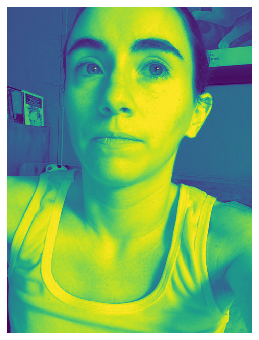

In [203]:
plt.figure(figsize=(8,6))
plt.axis('off')
plt.imshow(im[:,:,0]);

In [88]:
img = plt.imread(path + 'frames/02331.jpg')

(640, 480)


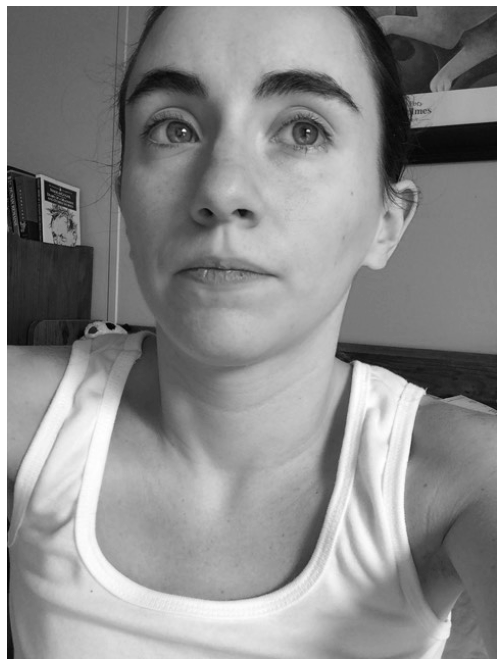

In [92]:
plt.figure(figsize=(16,12))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.axis('off')
plt.imshow(gray, cmap='gray');

In [209]:
gray.max()

255

In [165]:
with open('./Data_Mini/frames_flat.pkl','rb') as f:
    frames = pickle.load(f)

In [168]:
frames[:10]

['00002-00025.jpg',
 '00005-00000.jpg',
 '00010-00030.jpg',
 '00010-00049.jpg',
 '00010-00137.jpg',
 '00010-00183.jpg',
 '00010-00190.jpg',
 '00010-00250.jpg',
 '00010-00276.jpg',
 '00010-00317.jpg']

In [ ]:
for key, val in tqdm(frames.items()):
    for frame in val:
        copy = './Data_MIT/' + key + '/frames/' + frame + '.jpg'
        paste = './Data_Mini/Frames/' + key + '-' + frame + '.jpg'
        shutil.copyfile(copy, paste)
    

In [29]:
frames = [name for name in os.listdir('./Data_Mini/grid_mtcnn/')]
len(frames)

9994

In [252]:
path = './Data_Mini/Color_Patches/RightEye/'
reyes = [name for name in os.listdir(path)]

for eye in tqdm(reyes):
    read = path + eye
    img = cv2.imread(read)
    img = cv2.resize(img, (64, 64))
    cv2.imwrite(read, img);

In [251]:
path = './Data_Mini/Color_Patches/LeftEye/'
leyes = [name for name in os.listdir(path)]

for eye in tqdm(leyes):
    read = path + eye
    img = cv2.imread(read)
    img = cv2.resize(img, (64, 64))
    cv2.imwrite(read, img);


# Creating Final PKLs

In [22]:
len(frames_flat)

9994

In [64]:
data = []

path = './Data_Mini/grid_mtcnn/'
for frame in tqdm(frames):
    im = plt.imread(path+frame)
    data.append(im)
    
data = np.array(data)
data[data < 128] = 0
data[data >= 128] = 1
data = data[:,:,:,0]

with open('./Data_Mini/pickles/grid_mtcnn.pkl','wb') as f:
    pickle.dump(data, f)

(128, 96)

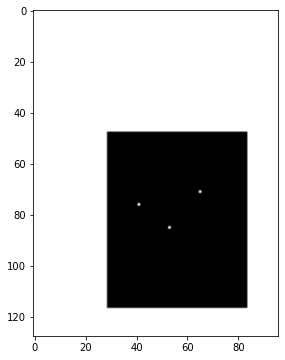

In [67]:
plt.figure(figsize=(8,6))
plt.imshow(data[9194], cmap='gray')
data[9194].shape

In [52]:
with open('./Data_Mini/grid_mtcnn/mtcnn_info.pkl','rb') as f:
    info = pickle.load(f)

In [ ]:
len(labels)

## Grayscaling

In [28]:
path_r = './Data_Mini/color_patches/face/'
path_s = './Data_Mini/gray_patches/face/'
face = [name for name in os.listdir(path_r)]

for fac in tqdm(face):
    read = path_r + fac
    img = cv2.imread(read)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    save = path_s + fac
    cv2.imwrite(save, gray)


In [277]:
data = []

path = './Data_Mini/color_patches/nose/'
for frame in tqdm(frames):
    im = plt.imread(path+frame)
    data.append(im)
    
data = np.array(data)
data = data / 255
data = data.astype('float32')

with open('./Data_Mini/pickles/nose.pkl','wb') as f:
    pickle.dump(data, f)

(9994, 64, 64, 3)


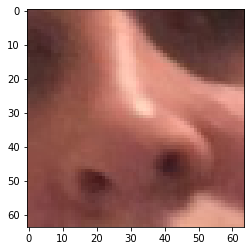

In [278]:
print(data.shape)
plt.imshow(data[1908]);

## Extract the eyes' patches width

In [58]:
wids = []
incons = []
for frame in tqdm(frames):
    path = './Data_MIT/' + frame[:5]
    idx = int(frame[-9:-4])
    with open(path + '/appleLeftEye.json', 'r') as file:
        eye_l = json.load(file)
    wl = eye_l['W'][idx]
    with open(path + '/appleRightEye.json', 'r') as file:
        eye_r = json.load(file)
    wr = eye_r['W'][idx]
    
    if wr != wl:
        incons.append(frame)
    
    wids.append([wl, frame])


In [62]:
with open('./Data_Mini/eyes_widths.pkl','wb') as f:
    pickle.dump(wids, f)

In [63]:
len(wids)

9994

In [66]:
len(incons)

0

In [73]:
wids[0]

[103.103613281, '00002-00025.jpg']

In [164]:
with open('./Data_Mini/mtcnn_info.pkl','rb') as f:
    mtcnns = pickle.load(f)

len(mtcnns)

9994

In [155]:
mtcnns[91]

[{'box': [93, 184, 300, 427],
  'confidence': 0.999988317489624,
  'keypoints': {'left_eye': (185, 353),
   'right_eye': (326, 357),
   'nose': (260, 446),
   'mouth_left': (193, 523),
   'mouth_right': (312, 522)}},
 {'box': [324, 13, 18, 21],
  'confidence': 0.9728212952613831,
  'keypoints': {'left_eye': (330, 20),
   'right_eye': (339, 20),
   'nose': (335, 25),
   'mouth_left': (330, 29),
   'mouth_right': (339, 29)}},
 '00123-00029.jpg']

In [235]:
idx=92

In [236]:
width[idx]

[113.568005371, '00123-00110.jpg']

In [237]:
frames[idx]

'00123-00110.jpg'

In [238]:
mtcnns[idx]

[{'box': [88, 172, 293, 424],
  'confidence': 0.9999876022338867,
  'keypoints': {'left_eye': (175, 343),
   'right_eye': (311, 341),
   'nose': (247, 430),
   'mouth_left': (186, 506),
   'mouth_right': (301, 501)}},
 {'box': [349, 1, 23, 24],
  'confidence': 0.8889774084091187,
  'keypoints': {'left_eye': (356, 12),
   'right_eye': (365, 8),
   'nose': (362, 16),
   'mouth_left': (359, 20),
   'mouth_right': (369, 17)}},
 {'box': [325, 6, 19, 23],
  'confidence': 0.8576502203941345,
  'keypoints': {'left_eye': (331, 15),
   'right_eye': (341, 14),
   'nose': (337, 19),
   'mouth_left': (332, 24),
   'mouth_right': (341, 23)}},
 '00123-00110.jpg']

In [240]:
while len(mtcnns[idx]) != 2:
    if mtcnns[idx][0]['box'][2] > mtcnns[idx][1]['box'][2]:
        mtcnns[idx].pop(1)
    else:
        mtcnns[idx].pop(0)

x = mtcnns[idx][0]['keypoints']['nose'][0]
y = mtcnns[idx][0]['keypoints']['nose'][1]
fram = mtcnns[idx][1]
half_edge = round(wids[idx][0]/2)
frme = wids[idx][1]
x, y, half, frme, fram

(247, 430, 52, '00123-00110.jpg', '00123-00110.jpg')

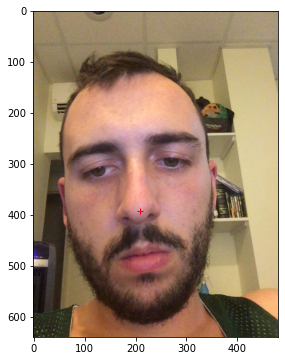

In [220]:
plt.figure(figsize=(8,6))
img = plt.imread('./Data_Mini/frames/' + fram)
plt.plot(x,y,'r+')
plt.imshow(img);

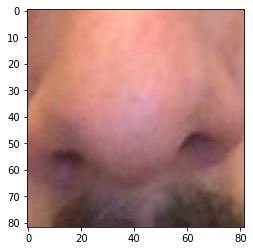

In [221]:
patch = img[y-half_edge:y+half_edge,x-half_edge:x+half_edge]
plt.imshow(patch);

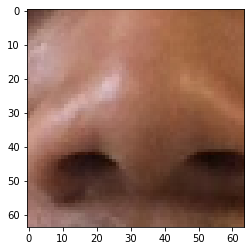

In [202]:
patch = cv2.resize(patch, (64, 64))
plt.imshow(patch);

# Nose Patches

In [290]:
with open('./Data_Mini/mtcnn_info.pkl','rb') as f:
    mtcnns = pickle.load(f)
    
with open('./Data_Mini/frames_flat.pkl','rb') as f:
    frames = pickle.load(f)
    
with open('./Data_Mini/eyes_widths.pkl','rb') as f:
    width = pickle.load(f)

In [291]:
mtcnns[92][-1]

'00123-00110.jpg'

In [289]:
from operator import itemgetter
mtcnns.sort(key=itemgetter(-1))

In [292]:
for idx in range(9994):
    if (mtcnns[idx][-1] != wids[idx][1]) or (mtcnns[idx][-1] != frames[idx]) or (wids[idx][1] != frames[idx]):
        print(idx)
        print(mtcnns[idx][-1])
        print(wids[idx][1])
        print(frames[idx])
        break

In [286]:
with open('./Data_Mini/mtcnn_info.pkl','wb') as f:
    pickle.dump(mtcnns,f)


In [254]:
idx

1501

In [256]:
mtcnns[idx]

[{'box': [57, 151, 267, 344],
  'confidence': 0.9999926090240479,
  'keypoints': {'left_eye': (131, 288),
   'right_eye': (252, 283),
   'nose': (190, 368),
   'mouth_left': (155, 427),
   'mouth_right': (246, 421)}},
 '02922-00041.jpg']

In [276]:
issues = []
path_read = './Data_Mini/frames/'
path_save = './Data_Mini/color_patches/nose/'

for idx in tqdm(range(9994)):
    
    while len(mtcnns[idx]) != 2:
        if mtcnns[idx][0]['box'][2] > mtcnns[idx][1]['box'][2]:
            mtcnns[idx].pop(1)
        else:
            mtcnns[idx].pop(0)

    read = path_read + mtcnns[idx][-1]
    img = cv2.imread(read)        
    
    
    nose_x = mtcnns[idx][0]['keypoints']['nose'][0]
    nose_y = mtcnns[idx][0]['keypoints']['nose'][1]
    half_edge = round(wids[idx][0]/2)
    nose = img[nose_y-half_edge:nose_y+half_edge,
               nose_x-half_edge:nose_x+half_edge]
    
    nose = cv2.resize(nose, (64, 64))
    
    if mtcnns[idx][-1] != wids[idx][1]:
        issues.append(idx)
    
    save = path_save + wids[idx][1]
    cv2.imwrite(save, nose)
    

In [249]:
len(issues)

8493

In [228]:
idx = 92
mtcnns[idx]

[{'box': [88, 172, 293, 424],
  'confidence': 0.9999876022338867,
  'keypoints': {'left_eye': (175, 343),
   'right_eye': (311, 341),
   'nose': (247, 430),
   'mouth_left': (186, 506),
   'mouth_right': (301, 501)}},
 {'box': [349, 1, 23, 24],
  'confidence': 0.8889774084091187,
  'keypoints': {'left_eye': (356, 12),
   'right_eye': (365, 8),
   'nose': (362, 16),
   'mouth_left': (359, 20),
   'mouth_right': (369, 17)}},
 {'box': [325, 6, 19, 23],
  'confidence': 0.8576502203941345,
  'keypoints': {'left_eye': (331, 15),
   'right_eye': (341, 14),
   'nose': (337, 19),
   'mouth_left': (332, 24),
   'mouth_right': (341, 23)}},
 '00123-00110.jpg']

In [229]:
if len(mtcnns[idx]) > 2:
    if mtcnns[idx][0]['box'][2] > mtcnns[idx][1]['box'][2]:
        mtcnns[idx].remove(mtcnns[idx][1])
            print
        else:
            mtcnns[idx].pop(0)

    print('yes')

yes


In [201]:
print(mtcnns[idx][1])
print(wids[idx][1])

00237-00024.jpg
00237-00024.jpg


In [203]:
fre = '01281-00012.jpg'
for indx, fr in enumerate(frames):
    if fr==fre:
        print(indx)

3542
